##Practica 2


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

### Problema 1 ¿en que negocio conviene comprar?


In [56]:
# Variables
n1, k1 = 10, 10
n2, k2 = 50, 48
n3, k3 = 200, 186

In [57]:
# Pp  prior uniforme en (0,1) sobre los p_i
def Pp(p):
    return 1


# Pk_np
# k_i, el numero de "me gustas" que recibe el negocio i. k_i <= n_i
def Pk_np(k, n, p):
    return st.binom.pmf(k, n, p)

#### 1.1 Interpretacion de Galton Board


- Cada obstaculo representa una decision binomial, gusta o no gusta.
- Cada recipiente representa el numero total de "me gusta" posible
- La cantidad de niveles representa el numero de personas $n_i$ que toman la decision


#### 1.2 Plotear posterior de $p_i$


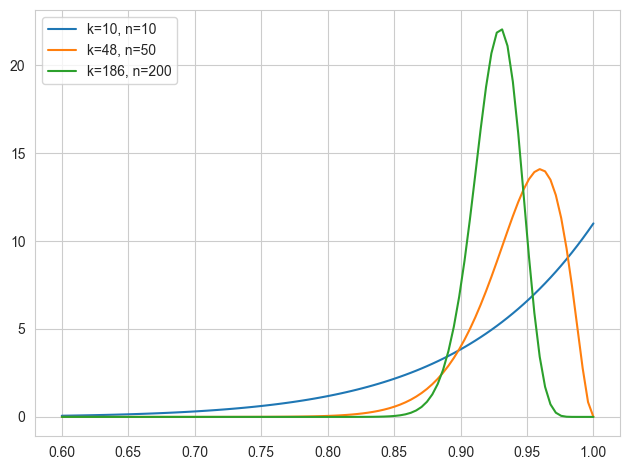

In [58]:
# Posterior de p_i
def Pp_kn(p, k, n):
    return st.beta.pdf(p, k + 1, n - k + 1)


plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k1, n1),
    label=f"k={k1}, n={n1}",
)
plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k2, n2),
    label=f"k={k2}, n={n2}",
)
plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k3, n3),
    label=f"k={k3}, n={n3}",
)

plt.legend()
plt.tight_layout()

#### 1.3 Intervalos de credibilidad de $p_i$


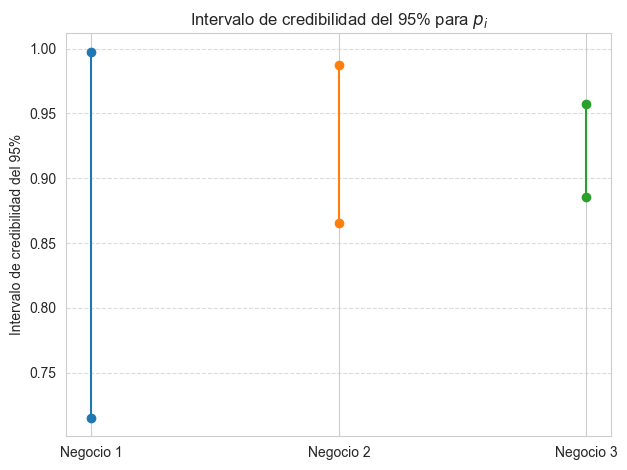

In [59]:
# intervalos de credibilidad del 95%

intervalos = [
    st.beta.interval(0.95, k1 + 1, n1 - k1 + 1),
    st.beta.interval(0.95, k2 + 1, n2 - k2 + 1),
    st.beta.interval(0.95, k3 + 1, n3 - k3 + 1),
]

labels = ["Negocio 1", "Negocio 2", "Negocio 3"]
x = np.arange(len(labels))

plt.figure()
for i, (low, high) in enumerate(intervalos):
    plt.plot([i, i], [low, high], marker="o")

plt.xticks(x, labels)
plt.ylabel("Intervalo de credibilidad del 95%")
plt.title("Intervalo de credibilidad del 95% para $p_i$")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### 1.4 Elegir donde comprar.


- ¿que forma tiene la expresion final? la del valor esperado para P dados los datos


In [60]:
from scipy.integrate import quad

# Calcular la distribucion de probabilidad marginal de nuestra experiencia dado los datos,
# integrando todos los valores de p.

prob_marginal_m = []
for k, n in [(k1, n1), (k2, n2), (k3, n3)]:
    integral, _ = quad(lambda p: p * Pp_kn(p, k, n), 0, 1)
    prob_marginal_m.append(integral)

for i, p in enumerate(prob_marginal_m):
    print(f"Probabilidad marginal de m=1 para el negocio {i+1}: {p:.3f}")

Probabilidad marginal de m=1 para el negocio 1: 0.917
Probabilidad marginal de m=1 para el negocio 2: 0.942
Probabilidad marginal de m=1 para el negocio 3: 0.926


### Problema 2 - Arqueras Mexicanas


Variables:

- $x$ = posicion del arco
- $y_i$ = posicion de la flecha
- $\beta$ = desvio standard de la posicion de la flecha
- $\sigma$ = desvio standard de la posicion del arco
- $\mu$ = posicion promedio del arco

Posicion de la flecha: $$P(y_i|x) = N(y_i|x,\beta^2)$$

Prior sobre la posicion del arco: $$P(x) = N(x|\mu,\sigma^2)$$


#### 2.1 Prediccion sobre la posicion de la primera flecha


In [141]:
## aproximacion numerica de P(y)


# Prior sobre x
def Px(x):
    mu = 0
    sigma = 2
    return st.norm.pdf(x, mu, sigma)


# supongo que beta = 1
def Py_x(y, x):
    return st.norm.pdf(y, x, 1)


def aproximacion_Py(range):
    matrix = np.zeros((len(range), len(range)))

    for i, x in enumerate(range):
        for j, y in enumerate(range):
            matrix[i, j] = Py_x(y, x) * Px(x)

    return matrix

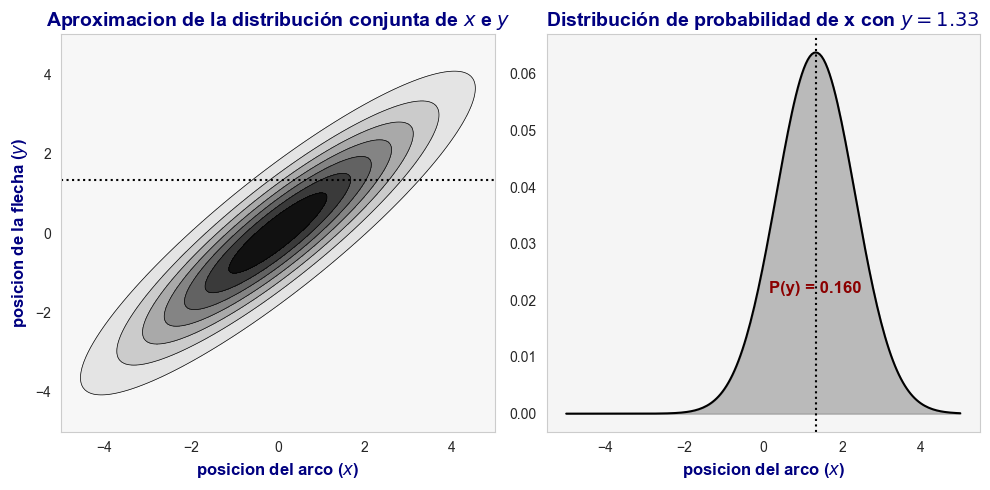

In [145]:
range = np.linspace(-5, 5, 200)
Z = aproximacion_Py(range)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

### Distribucion conjunta aproximada

contour_filled = ax[0].contourf(range, range, Z, levels=7, cmap="Greys")
contour_lines = ax[0].contour(range, range, Z, levels=7, colors="black", linewidths=0.5)

ax[0].set_xlabel(
    "posicion del arco ($x$)", fontsize=12, fontweight="bold", color="navy"
)
ax[0].set_ylabel(
    "posicion de la flecha ($y$)", fontsize=12, fontweight="bold", color="navy"
)
ax[0].set_title(
    "Aproximacion de la distribución conjunta de $x$ e $y$",
    fontsize=14,
    fontweight="bold",
    color="navy",
)

# Integro sobre x para la posicion de y = y_val
y_val = 1.33
index_y_val = np.abs(range - y_val).argmin()

ax[0].axhline(y=y_val, color="black", linestyle="dotted")


### Distribucion de probabilidad a priori de Y.

Z_at_y_val = Z[index_y_val, :]

ax[1].plot(range, Z_at_y_val, color="black")
ax[1].fill_between(range, Z_at_y_val, color="grey", alpha=0.5)

ax[1].set_xlabel(
    "posicion del arco ($x$)", fontsize=12, fontweight="bold", color="navy"
)

ax[1].set_title(
    f"Distribución de probabilidad de x con $y={y_val}$",
    fontsize=14,
    fontweight="bold",
    color="navy",
)

# integrar area bajo al curva

integral = np.trapezoid(Z_at_y_val, range)


ax[1].text(
    y_val,
    max(Z_at_y_val) / 3,
    f"P(y) = {integral:.3f}",
    fontsize=12,
    fontweight="bold",
    color="darkred",
    ha="center",
)

ax[1].axvline(x=y_val, color="black", linestyle="dotted")


ax[0].grid(False)
ax[1].grid(False)
ax[0].set_facecolor("whitesmoke")
ax[1].set_facecolor("whitesmoke")

plt.tight_layout()